## 1번

데이터 확인 및 전처리

1.1 결측치를 확인하고, 결측치 제거할 것

1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

데이터 설명

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

출처

https://archive.ics.uci.edu/ml/index.phpm

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [30]:
df.isna().sum()
# 결측치 확인 결과 Quantity, UnitPrice로 둘다 연속형 변수이다. 
# 이에 따라 

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [31]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,35776.000000,35704.000000,35801.000000
mean,18.426040,4.612001,13221.824390
std,42.162427,48.082538,1012.177727
min,-480.000000,0.000000,12354.000000
25%,4.000000,1.250000,12523.000000
50%,10.000000,1.950000,12681.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17097.000000


In [37]:
fill_mean_fuc = lambda g:g.fillna(g.mean())
df = df.groupby('StockCode').apply(fill_mean_fuc)

In [38]:
df["Quantity"]= df.Quantity.apply(lambda x: round(x))

In [42]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      1
CustomerID     0
Country        0
dtype: int64

In [47]:
df['UnitPrice'][df['UnitPrice'].isnull()]

9433   NaN
Name: UnitPrice, dtype: float64

In [48]:
df.loc[9433]

InvoiceNo               574059
StockCode                23416
Description       CHAMBRE HOOK
Quantity                     1
InvoiceDate    11/2/2011 14:13
UnitPrice                  NaN
CustomerID             14646.0
Country            Netherlands
Name: 9433, dtype: object

In [56]:
df.loc[df['StockCode']=='23416']
#  StockCode가 23416인 상품은 하나로 그 값이 결측치여서 평균으로 대체되지 않았다.
# 결측치가 하나로 삭제를 진행한다.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9433,574059,23416,CHAMBRE HOOK,1,11/2/2011 14:13,NaN,14646.0,Netherlands


In [57]:
df.dropna(subset=['UnitPrice'],axis=0, inplace=True)

In [58]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [59]:
# 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것
# 이상치 제거 방법에는 데이터의 수가 매우 많고 이상치가 존재하는 행이 전체 데이터에 비해 많이 않을 경우 행 전체를 삭제하는 방법이 있고
# 이상치를 다른 값으로 대체하는 방법을 사용할 수 있다.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35800 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35800 non-null  object 
 1   StockCode    35800 non-null  object 
 2   Description  35800 non-null  object 
 3   Quantity     35800 non-null  int64  
 4   InvoiceDate  35800 non-null  object 
 5   UnitPrice    35800 non-null  float64
 6   CustomerID   35800 non-null  float64
 7   Country      35800 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


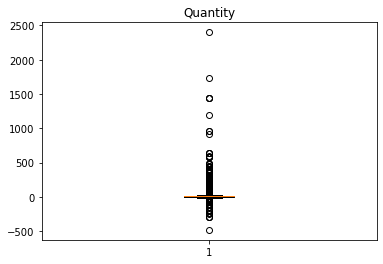

In [62]:
plt.title('Quantity')
plt.boxplot(df['Quantity'],whis=1.5)
plt.show()

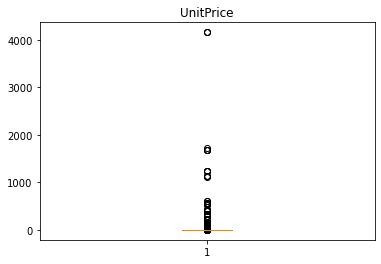

In [64]:
plt.title('UnitPrice')
plt.boxplot(df['UnitPrice'],whis=1.5)
plt.show()

- boxplot을 통한 이상치 확인 결과 Quantity의 경우 이상치들이 있지만 이상치들이 연속적으로 이어져 있어 실제로 이상치를 가졌을 수 있다고 판다해 이상치를 처리하지 않는다. UnitPrice의 경우 이상치들이 연속적으로 이어져 있다가 데이터 값이 4000이상인 멀리 떨어진 데이터가 확인됐다. 이 데이터를 확인 후 처리하겠다.

In [69]:
df[df['UnitPrice']>3500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12353,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536.0,France
24047,C573079,M,Manual,-2,10/27/2011 14:15,4161.06,12536.0,France
28503,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536.0,France


In [79]:
df.query('StockCode=="M"').query('Country=="France"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1841,C548914,M,Manual,-1,4/5/2011 9:46,1136.30,12669.0,France
2794,574252,M,Manual,1,11/3/2011 13:24,0.00,12437.0,France
10978,574506,M,Manual,1,11/4/2011 13:24,3.95,12577.0,France
11475,C580263,M,Manual,-4,12/2/2011 12:43,9.95,12536.0,France
12353,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536.0,France
23638,548913,M,Manual,1,4/5/2011 9:45,1136.30,12669.0,France
24047,C573079,M,Manual,-2,10/27/2011 14:15,4161.06,12536.0,France
26715,553357,M,Manual,2,5/16/2011 14:17,15.00,12684.0,France
28503,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536.0,France
32164,C580263,M,Manual,-16,12/2/2011 12:43,0.29,12536.0,France


- UnitPrice의 이상치를 확인해본 결과 같은 고객임을 확인할 수 있다 하지만 거래가 발생한 시간과 수량에 있어서 이해하기 힘든 부분이 보이고 그 데이터의 수가 많지 않으므로 삭제한다.

In [83]:
outliers = df[df['UnitPrice']>3500].index
df.drop(index=outliers, inplace=True)

In [85]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,35797.000000,35797.000000,35797.000000
mean,18.425874,4.259563,13221.842082
std,42.150227,29.291048,1012.186816
min,-480.000000,0.000000,12354.000000
25%,4.000000,1.250000,12523.000000
50%,10.000000,1.950000,12681.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,1715.850000,17097.000000


In [86]:
# 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

In [87]:
from sklearn.cluster import KMeans

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35797 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35797 non-null  object 
 1   StockCode    35797 non-null  object 
 2   Description  35797 non-null  object 
 3   Quantity     35797 non-null  int64  
 4   InvoiceDate  35797 non-null  object 
 5   UnitPrice    35797 non-null  float64
 6   CustomerID   35797 non-null  float64
 7   Country      35797 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [92]:
X = df[['Quantity','UnitPrice']]

## 2. 군집분석

2.1 위에서 생성한 군집들의 특성을 분석할 것

2.2 각 군집 별 대표 추천 상품을 도출할 것

2.3 CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

## 3. 통계

철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [1]:
import numpy as np
import scipy.stats as stats

In [11]:
#stats.norm.ppf(N) -> 정규분포의 확률이 N이 되는 Z값
confidence = 0.1
d= 0.05
z = stats.norm.ppf(1-0.1/2)
p=0.5
n = ((z**2)*(0.5*0.5))/(d**2)
n
# 적절한 표본의 크기 중 최소값은 271이다


270.5543454095412

## 4. 통계

아래 그래프는 1월부터 9월까지의 은의 가격이다

4.1 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

4.2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({'1월':[12.14],'2월':[42.6],'3월':[34.4],'4월':[35.29],'5월':[30.96],'6월':[57.12],'7월':[37.84],'8월':[42.49],'9월':[31.38]})
df.index=['가격']
df

,1월,2월,3월,4월,5월,6월,7월,8월,9월
가격,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [77]:
df1 = pd.DataFrame({'날짜':['1월','2월','3월','4월','5월','6월','7월','8월','9월'],
                   'Price':[12.14, 42.60, 34.40, 35.29, 30.29, 57.12, 37.84, 42.49, 31.38]})
df1

,날짜,Price
0,1월,12.14
1,2월,42.60
2,3월,34.40
3,4월,35.29
4,5월,30.29
5,6월,57.12
6,7월,37.84
7,8월,42.49
8,9월,31.38


In [91]:
ma3 = df1['Price'].rolling(window=3).mean() 
ma3 = ma3.reset_index()

In [92]:
ma3

,index,Price
0,0,NaN
1,1,NaN
2,2,29.713333
3,3,37.430000
4,4,33.326667
5,5,40.900000
6,6,41.750000
7,7,45.816667
8,8,37.236667


C:\Users\82107\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


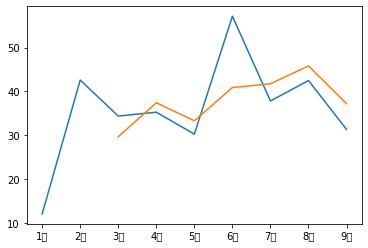

In [94]:
# 4.1
plt.plot(df1['날짜'],df1['Price'])
plt.plot(ma3.index, ma3.Price)
plt.show()

In [103]:
# 4.2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림 -
up = round(((31.38-12.14)/12.14),2)*100
print('가격 증가율은 :',up,'%')

가격 증가율은 : 158.0 %


## 5번

아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

5.1 연구가설과 귀무가설을 설정하라

5.2 검정통계량 구하고 결론을 내라

In [2]:
import pandas as pd

In [25]:
df = pd.DataFrame({'A':[176,124],'B':[193,107],'C':[159,141]},
                 index=['찬성','반대'])
df

,A,B,C
찬성,176,193,159
반대,124,107,141


In [26]:
# 5.1 
# 귀무가설: 자치구별 지지율에는 차이가 없다.
# 대립가설: 자치구별 지지율에는 차이가 있다.

In [39]:
import scipy.stats as stats
stats.chi2_contingency(df)
# 검통계량 값은 3.284090909090909이고 p-value는 0.018로 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다.
# 즉 자구별 지지율에는 차이가 없다.

(7.945381231671554,
 0.01882272023214683,
 2,
 array([[176., 176., 176.],
        [124., 124., 124.]]))

## 6번

A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

6.1 연구가설과 귀무가설을 설정하라

6.2 통계량을 구하고, 연구가설 채택여부를 기술하라.

6.3 6.2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [40]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


In [47]:
male= df.loc[df.gender=='male','pressure']
female = df.loc[df.gender=='female','pressure']

In [43]:
# 6.1 연구가설과 귀무가설을 설정하라
# 귀무가설: 성별에 따른 평균 혈압에는 차이가 없다
# 대립가설: 성별에 따른 평균 혈압에는 차이가 있다.

In [50]:
# 6.2 통계량을 구하고, 연구가설 채택여부를 기술하라
stats.ttest_ind(male,female, equal_var=True)
# 검정결과 p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.
# 즉 성별에 따른 평균 혈압에는 차이가 없다.

Ttest_indResult(statistic=1.598335024574904, pvalue=0.12361716364314851)

In [ ]:
# 6.2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [54]:
import numpy as np

In [78]:
male_bar = np.mean(male)
female_bar = np.mean(female)
male_var = np.var(male)
female_var= np.var(female)
n1 = len(male)
n2 = len(female)
diff = male_bar= female_bar

In [81]:
c = [diff-1.598335024574904*se, diff+1.598335024574904*se]
c

[83.31946139009864, 96.50276083212356]

## 7번

height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

7.1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.

베이지안 회귀

시드넘버 1234로 지정

1000번의 burn-in 이후 10,000의 MCMC를 수행

회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

7.2 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [82]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
